# Analysis of end states of GLUT5 string 

We have 3 replicas of simulations, so need to load in 6 sims. I already processed some of the out and in open models and put them in `end_state_simulations`

I also have these mega old simulations from 2017 when I first noticed that the inward open state was unstable. Let's add them here

First, KDE plots of gates

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
sim_names = np.array(['r_in_1', 'r_in_2', 'r_in_3', 'c_in', 'r_in_noich5', 'r_in_old'])


sims_paths={'r_in_1':'../end_state_simulations/IN',
           'r_in_2':'../end_state_simulations/IN',
           'r_in_3':'../end_state_simulations/IN',
           'c_in':''
           
           
           }


In [2]:
in1 = mda.Universe('../end_state_simulations/IN/GLUT5_in.1.start.protonly.gro', '../end_state_simulations/IN/GLUT5_in.1.skip250.protonly.xtc')
in2 = mda.Universe('../end_state_simulations/IN/GLUT5_in.2.start.protonly.gro', '../end_state_simulations/IN/GLUT5_in.2.skip250.protonly.xtc')
in3 = mda.Universe('../end_state_simulations/IN/GLUT5_in.3.start.protonly.gro', '../end_state_simulations/IN/GLUT5_in.3.skip250.protonly.xtc')

old_sim_path = '../../../../../data/GLUT5_cg/old_stuff/GLUT_atomistic'
in_cow_glut5 = mda.Universe(f'{old_sim_path}/cow_IN/production/4yb9_in.6.eq.gro',\
                           f'{old_sim_path}/cow_IN/production/4yb9_in.0_200ns.skip50.xtc')

in_rGLUT5_no_ICH = mda.Universe(f'{old_sim_path}/no_ICH5_IN/equilibration/GLUT5_noICH5_in.6.eq.gro',\
                           f'{old_sim_path}/no_ICH5_IN/production/GLUT5_noICH5_in.0_200ns.skip50.xtc')

in_rGLUT5_ICH = mda.Universe(f'{old_sim_path}/IN/equilibration/GLUT5_in.6.eq.gro',\
                           f'{old_sim_path}/IN/production/GLUT_in.0_200ns.skip50.xtc')



out1 = mda.Universe('../end_state_simulations/OUT/GLUT5_out.1.start.protonly.gro', '../end_state_simulations/OUT/GLUT5_out.1.skip250.protonly.xtc')
out2 = mda.Universe('../end_state_simulations/OUT/GLUT5_out.2.start.protonly.gro', '../end_state_simulations/OUT/GLUT5_out.2.skip250.protonly.xtc')
out3 = mda.Universe('../end_state_simulations/OUT/GLUT5_out.3.start.protonly.gro', '../end_state_simulations/OUT/GLUT5_out.3.skip250.protonly.xtc')


In [20]:
in1_start = mda.Universe('../end_state_simulations/IN/GLUT5_in.1.start.protonly.gro')
in2_start = mda.Universe('../end_state_simulations/IN/GLUT5_in.2.start.protonly.gro')
in3_start = mda.Universe('../end_state_simulations/IN/GLUT5_in.3.start.protonly.gro')
old_sim_path_start = '../../../../../data/GLUT5_cg/old_stuff/GLUT_atomistic'
in_cow_glut5_start = mda.Universe(f'{old_sim_path}/cow_IN/production/4yb9_in.6.eq.gro')
in_rGLUT5_no_ICH_start = mda.Universe(f'{old_sim_path}/no_ICH5_IN/equilibration/GLUT5_noICH5_in.6.eq.gro')
in_rGLUT5_ICH_start = mda.Universe(f'{old_sim_path}/IN/equilibration/GLUT5_in.6.eq.gro')

In [3]:
gate_EC = [(30,37), (289,295)]
gate_IC = [(136,145), (386,394)]

In [4]:
from MDAnalysis.analysis import distances

def make_gate_arr(md_uni, gate_EC, gate_IC):
    gate_EC_dists = []
    gate_IC_dists = []
    
    for timestep in md_uni.trajectory:
        tm1 = md_uni.select_atoms('resid %i-%i' %(gate_EC[0][0], gate_EC[0][1])).center_of_mass()
        tm7 = md_uni.select_atoms('resid %i-%i' %(gate_EC[1][0], gate_EC[1][1])).center_of_mass()
        tm4 = md_uni.select_atoms('resid %i-%i' %(gate_IC[0][0], gate_IC[0][1])).center_of_mass()
        tm10 = md_uni.select_atoms('resid %i-%i' %(gate_IC[1][0], gate_IC[1][1])).center_of_mass()    


        gate_EC_dists.append(float(distances.distance_array(tm1, tm7)))
        gate_IC_dists.append(float(distances.distance_array(tm4, tm10)))

    return gate_EC_dists, gate_IC_dists

This was from the `plot_gate_dists` to add a colormap. I feel like it should be the same color as the original gate dists for clarity

In [5]:
def make_colormap(color_start,color_end,ncolors,name):
    color_array = np.zeros((ncolors,4))
    color_array[:,] = color_start
    #color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
    color_array[:,0] = np.linspace(color_start[0], color_end[0], ncolors)
    color_array[:,1] = np.linspace(color_start[1], color_end[1], ncolors)
    color_array[:,2] = np.linspace(color_start[2], color_end[2], ncolors)

    map_object = LinearSegmentedColormap.from_list(name=name,colors=color_array)
    plt.register_cmap(cmap=map_object)
    return color_array

In [6]:
color_start = [0.91,0.93,1.0,0]
color_start = [1.00,1.00,1.00,0.00]
ncolors = 256
t = make_colormap(color_start=color_start, color_end = [0.00,0.45,0.35,1.0], ncolors=ncolors, name='InOpen_b')

But now I want to try to put this over the FES so that it's clear that you don't stay in this state

Idk why but the gate dists from MDA don't start from the OG gro file so I have to add these I know it's getting a bit spaghetti

In [22]:
F = np.load('../../../string/string_sims/TMD_initial_path/influx_BFRU_gate_CV/F_MSM.npy')
extent = np.load('../../../string/string_sims/TMD_initial_path/influx_BFRU_gate_CV/extent_MSM.npy')

(0.75, 1.65)

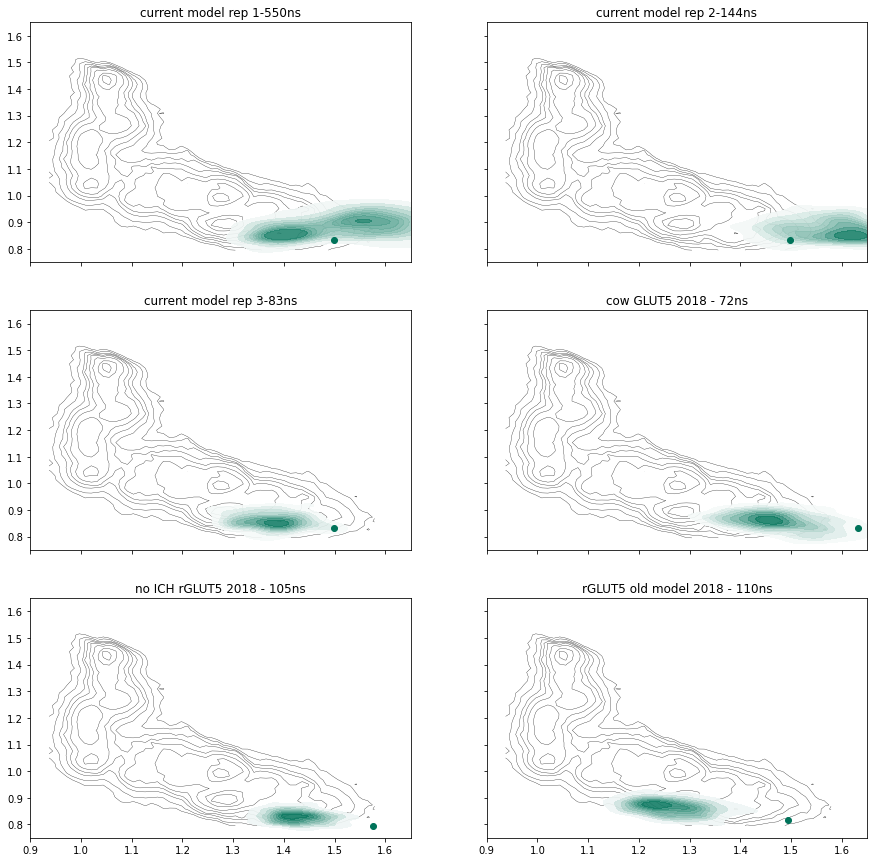

In [43]:
sims = np.array([in1,in2,in3,in_cow_glut5,in_rGLUT5_no_ICH, in_rGLUT5_ICH])
#sims_starts = np.array([in1_start,in2_start,in3_start,in_cow_glut5_start,\
#                        in_rGLUT5_no_ICH_start, in_rGLUT5_ICH_start])

sims_starts=np.array([u2,u2,u2,in_cow_glut5_start,in_rGLUT5_no_ICH_start,in_rGLUT5_ICH_start])

sim_names=np.array(['current model rep 1-550ns',\
                   'current model rep 2-144ns',\
                   'current model rep 3-83ns',\
                   'cow GLUT5 2018 - 72ns',\
                   'no ICH rGLUT5 2018 - 105ns',\
                   'rGLUT5 old model 2018 - 110ns'])

f,ax=plt.subplots(3,2,figsize=(15,15),sharex=True,sharey=True)
ax=np.ravel(ax)

levels=[0,0.5,1,2,3,4,5,7,10]


for n,sim in enumerate(sims):
    ec,ic = make_gate_arr(sim,gate_EC,gate_IC)
    ec=np.array(ec)/10
    ic=np.array(ic)/10
    
    ec_0,ic_0=make_gate_arr(sims_starts[n],gate_EC, gate_IC)
    
    sns.kdeplot(ic,y=ec,shade=True, thresh=0.05, alpha=0.9,legend=True, cbar=False, ax=ax[n], cmap='InOpen_b',zorder=2)
    ax[n].scatter(ic_0[0]/10,ec_0[0]/10,c='#00735a',zorder=3)
    ax[n].contour(F,extent=extent,vmin=0,vmax=10,colors='black',levels=levels,zorder=0, linewidths=0.3)
    #ax[n].contourf(F,extent=extent,vmin=0,vmax=10,levels=levels,cmap='YlOrBr_r',alpha=0.8, zorder=1)
    ax[n].set_title(sim_names[n])
plt.xlim(0.9,1.65)
plt.ylim(0.75,1.65)


In [40]:
u=mda.Universe('../end_state_simulations/IN/GLUT5_in.1.start.protonly.gro')
u2=mda.Universe('../input_f/protein_only/GLUT5_in.protein.start.gro')

In [41]:
make_gate_arr(u2,gate_EC,gate_IC)

([8.339082667922984], [14.987932906549135])

In [42]:
make_gate_arr(u,gate_EC,gate_IC)

([7.921342448850733], [15.628276743915627])

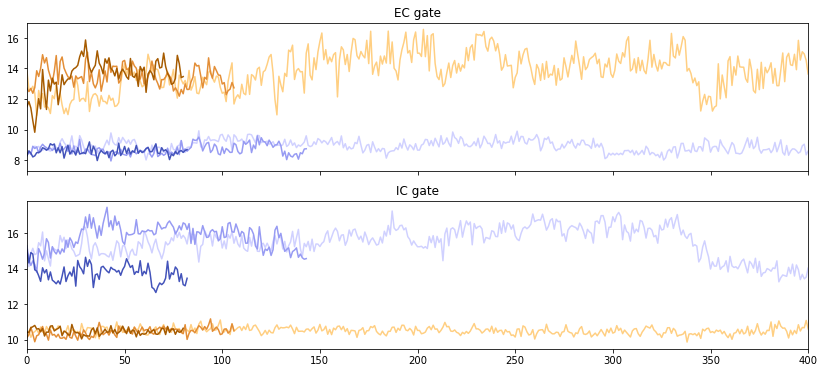

In [28]:
sims = [in1,in2,in3,out1,out2,out3]
names = ['In 1', 'In 2', 'In 3', 'Out 1', 'Out 2', 'Out 3']
colors = ['#D0D1FF','#979BF3', '#4353BA', '#FFCF82', '#E38E37', '#A65B00']
figsize = (14,6)
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize)

for ind, sim in enumerate(sims):
    ec, ic = make_gate_arr(sim, gate_EC, gate_IC)
    ax1.set_title('EC gate')
    ax1.plot(ec, label = names[ind], color = colors[ind])
    
    ax2.set_title("IC gate")
    ax2.plot(ic, label = names[ind], color = colors[ind])
    
#plt.legend()
plt.xlim(0,400)
plt.show()

# RMSD

(0.0, 400.0)

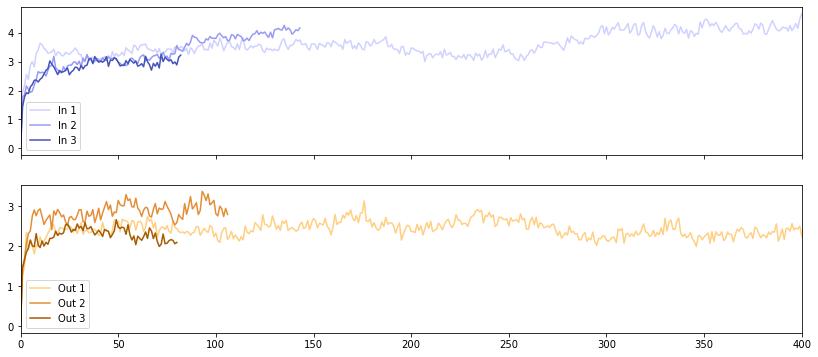

In [37]:
import MDAnalysis.analysis.rms

figsize = (14,6)
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize)


for ind, sim in enumerate(sims):
    RMSD = MDAnalysis.analysis.rms.RMSD(sim, select = 'backbone', center = True)
    RMSD.run()
    
    rmsd = RMSD.rmsd.T
    if ind < 3:
        ax1.plot(rmsd[2], label = names[ind], color = colors[ind])
        ax1.legend()
    else:
        ax2.plot(rmsd[2], label = names[ind], color = colors[ind])
        ax2.legend()
plt.xlim(0,400)